Tasks:

- Convert from multicalss to binary classification target
- Introduce outliers
- Create an imbalance of classes in target
- Introduce null values
- Introduce negative values
- Rename "train_mobil_data" file to "mobile_data"



In [156]:
# Import pandas
import pandas as pd

# Load 'train' dataset
df_train=pd.read_csv('./train_mobil_data.csv')

# Load 'test' dataset
df_test=pd.read_csv('./test_mobile_data.csv')



In [157]:
# Inspect data
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [158]:
# Inspect data
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [159]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [161]:
df_test.shape

(1000, 21)

In [162]:
df_train.shape

(2000, 21)



------------------
## NOTE:  ***Test dataset does NOT have a price_range column, should not be combined to the training***
-------------------

# Reducing the Number of Classes from 4 to 2
- We are going to make the project a binary classification problem because students were not introduced to multiclass classification

In [163]:
# looking at the class count on the target variable of our data
df_train.value_counts('price_range')

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [164]:
# Modify target from multiple classes to only 2 classes
df_train.loc[((df_train.price_range == 0) | (df_train.price_range == 1)), "price_range"] = 0
df_train.loc[((df_train.price_range == 2) | (df_train.price_range == 3)), "price_range"] = 1

In [165]:
df_train.value_counts('price_range')

price_range
0    1000
1    1000
dtype: int64

# Introducing Ouliers (weight, internal merory, talk time)
- Introducing outliers to the data, to test the students on the data preparation section of the project

In [166]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,0.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,0.500125
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,0.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
df_train.value_counts('mobile_wt').sort_values()

mobile_wt
140     9
120     9
149     9
96      9
116    10
       ..
146    26
199    26
185    27
101    27
182    28
Length: 121, dtype: int64

<AxesSubplot:xlabel='talk_time'>

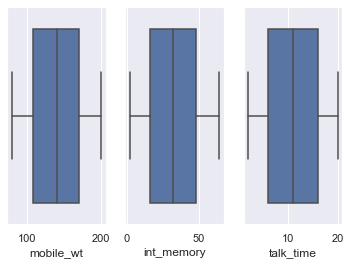

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='mobile_wt',data=df_train,ax=axs[0])
sns.boxplot(x='int_memory',data=df_train, ax=axs[1])
sns.boxplot(x='talk_time',data=df_train, ax=axs[2])

In [169]:
mobile_wt_200 = df_train[df_train['mobile_wt']>=188]
mobile_wt_200

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
13,803,1,2.1,0,7,0,17,1.0,198,4,...,344,1440,2680,7,1,4,1,0,1,1
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,0
29,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,672,1,0.6,1,13,0,61,0.1,194,5,...,724,1127,1457,14,10,20,1,0,1,0
1964,1753,0,0.7,0,4,0,40,0.6,191,4,...,1652,1983,1112,8,2,15,1,1,1,0
1974,915,1,0.5,1,9,1,33,0.3,199,2,...,503,986,2156,7,3,13,1,1,0,0
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,0


In [170]:
df_train.loc[((df_train.mobile_wt == 188) & (df_train.battery_power == 819)), "mobile_wt"] = 300

In [171]:
df_train.loc[((df_train.mobile_wt == 194) & (df_train.battery_power == 672)), "mobile_wt"] = 350

In [172]:
df_train.loc[((df_train.mobile_wt == 199) & (df_train.battery_power == 915)), "mobile_wt"] = 450

In [173]:
df_train.loc[((df_train.mobile_wt == 198) & (df_train.battery_power == 674)), "mobile_wt"] = 455

In [174]:
mobile_wt_outlier = df_train[df_train['mobile_wt']>200]
mobile_wt_outlier

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
75,819,0,0.6,1,8,1,42,0.9,300,6,...,339,1242,1814,5,4,13,1,0,1,0
1961,672,1,0.6,1,13,0,61,0.1,350,5,...,724,1127,1457,14,10,20,1,0,1,0
1974,915,1,0.5,1,9,1,33,0.3,450,2,...,503,986,2156,7,3,13,1,1,0,0
1992,674,1,2.9,1,1,0,21,0.2,455,3,...,576,1809,1180,6,3,4,1,1,1,0


In [175]:
int_memory_61 = df_train[df_train['int_memory']>=61]
int_memory_61

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
36,589,1,2.3,1,1,0,61,0.6,160,4,...,429,815,2113,13,7,2,1,0,1,0
49,596,0,2.1,1,9,0,64,0.8,111,8,...,885,1854,3238,16,13,10,0,0,0,1
51,1760,0,1.4,1,5,0,63,0.8,127,8,...,1382,1383,2053,19,12,16,0,1,0,1
57,987,0,1.3,1,0,1,61,0.4,107,3,...,581,820,3963,9,4,20,1,0,1,1
61,799,1,2.3,0,1,1,63,0.8,144,8,...,361,975,431,15,6,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,1176,1,2.1,0,2,1,62,0.5,168,2,...,674,1455,1534,6,2,17,1,0,0,0
1927,1023,1,0.7,0,2,1,63,0.7,153,7,...,367,1985,3155,11,10,7,1,1,1,1
1949,757,1,0.9,1,4,0,64,0.5,157,7,...,114,819,3433,6,5,10,1,1,0,1
1953,727,1,2.5,1,0,1,64,0.2,193,1,...,664,711,3654,9,1,16,1,1,0,1


In [176]:
df_train.loc[((df_train.int_memory == 63) & (df_train.battery_power == 799)), "int_memory"] = 160

In [177]:
df_train.loc[((df_train.int_memory == 63) & (df_train.battery_power == 1023)), "int_memory"] = 170

In [178]:
df_train.loc[((df_train.int_memory == 61) & (df_train.battery_power == 672)), "int_memory"] = 180

In [179]:
df_train.loc[((df_train.int_memory == 64) & (df_train.battery_power == 727)), "int_memory"] = 185

In [180]:
int_memory_outlier = df_train[df_train['int_memory']>70]
int_memory_outlier


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
61,799,1,2.3,0,1,1,160,0.8,144,8,...,361,975,431,15,6,6,1,1,1,0
1927,1023,1,0.7,0,2,1,170,0.7,153,7,...,367,1985,3155,11,10,7,1,1,1,1
1953,727,1,2.5,1,0,1,185,0.2,193,1,...,664,711,3654,9,1,16,1,1,0,1
1961,672,1,0.6,1,13,0,180,0.1,350,5,...,724,1127,1457,14,10,20,1,0,1,0


<AxesSubplot:xlabel='talk_time'>

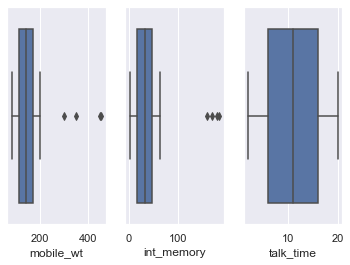

In [181]:
# import seaborn
import seaborn as sns


fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='mobile_wt',data=df_train,ax=axs[0])
sns.boxplot(x='int_memory',data=df_train, ax=axs[1])
sns.boxplot(x='talk_time',data=df_train, ax=axs[2])

### Storing the Data in New File

In [2]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)